In [1]:
import torch
print(torch.cuda.is_available(), torch.backends.cudnn.is_available(), torch.cuda.get_device_name(0))
from torch import nn
from torch.utils.data import DataLoader    # DataLoader: dataset generator
from torchvision import datasets           # datasets: TorchText, TorchVision, and TorchAudio
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import numpy as np

True True GeForce GTX 1650 with Max-Q Design


In [39]:
#* FIRST LOOK OF TENSOR

# class torch.device (str)
device = torch.device('cuda')
print(device)

# class torch.Tensor (list/numpy) # method/attributes: size(), shape, dtype
# printable, iterable, calculatable
T1 = torch.Tensor([[1,2,3],[4,5,6]])
T2 = torch.Tensor(np.array([[1,2,3],[4,5,6]]))
print(T1, T1.size(), T1.shape, T1.shape[0], T1.dtype, T1.device)
print(T1+T2, "\n", T1-T2, "\n", T1*T2, "\n", T1/T2)
print(T1.requires_grad_(True))
print(T1.to(device))
print(T2.numpy(), "\n")

# functions -> torch.Tensor
print( torch.zeros((2,4), dtype=torch.int32) )
print( torch.ones((2,4), dtype=torch.float64, device=device) )
print( torch.rand(2, 3, device=device) )

cuda
tensor([[1., 2., 3.],
        [4., 5., 6.]]) torch.Size([2, 3]) torch.Size([2, 3]) 2 torch.float32 cpu
tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]]) 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 
 tensor([[ 1.,  4.,  9.],
        [16., 25., 36.]]) 
 tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]], requires_grad=True)
tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0', grad_fn=<CopyBackwards>)
[[1. 2. 3.]
 [4. 5. 6.]] 

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int32)
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], device='cuda:0', dtype=torch.float64)
tensor([[0.4451, 0.0390, 0.6835],
        [0.3232, 0.2523, 0.8295]], device='cuda:0')


In [60]:
training_data = datasets.FashionMNIST(root="data", train=True, download=True, transform=ToTensor())
test_data = datasets.FashionMNIST(root="data", train=False, download=True, transform=ToTensor())
print(len(training_data), training_data[0][0].shape, training_data[0][1]) # xTrain, yTrain
print(len(test_data), test_data[0][0].shape, test_data[0][1]) # xTest, yTest

batch_size = 64
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True, pin_memory=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True, pin_memory=True)

for X,y in train_dataloader:
    print(X.shape, y.shape)
    break
for X,y in test_dataloader:
    print(X.shape, y.shape)
    break

60000 torch.Size([1, 28, 28]) 9
10000 torch.Size([1, 28, 28]) 9
torch.Size([64, 1, 28, 28]) torch.Size([64])
torch.Size([64, 1, 28, 28]) torch.Size([64])


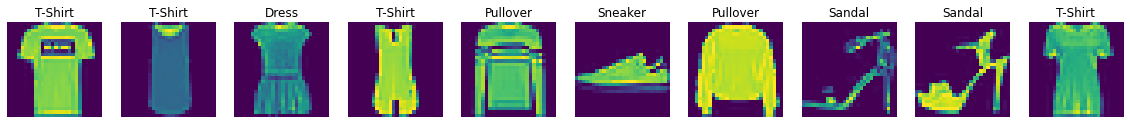

In [56]:
category = ["T-Shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", \
    "Bag", "Ankle Boot"]
plt.figure(figsize=(20,5))
for i in range(1,10+1):
    plt.subplot(1,10,i)
    plt.imshow(training_data[i][0].reshape(28,28,1))
    plt.title(category[training_data[i][1]])
    plt.axis("off")
plt.show()

In [4]:
#* PREPARE CUSTOM DATA
from torch.utils.data import TensorDataset # torch.Tensor -> torch.dataset
xTrain, yTrain = np.array([[1.,2,3],[3,4,5]]), np.array([4,2])
xVal,   yVal   = np.array([[5.,6,7],[7,8,9]]), np.array([6,8])

my_train_dataset = TensorDataset(torch.Tensor(xTrain), torch.Tensor(yTrain))
my_val_dataset   = TensorDataset(torch.Tensor(xVal), torch.Tensor(yVal))
print(len(my_train_dataset), len(my_val_dataset))
my_train_dataloader = DataLoader(my_train_dataset)
my_val_dataloader   = DataLoader(my_val_dataset)
for X,y in my_train_dataloader:
    print(X.shape, y.shape)
    break
for X,y in my_val_dataloader:
    print(X.shape, y.shape)
    break

2 2
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])


In [18]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

print()
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)

Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0084, -0.0294,  0.0281,  ...,  0.0056, -0.0040,  0.0194],
        [-0.0238, -0.0249, -0.0075,  ..., -0.0255, -0.0146,  0.0005]],
       device='cuda:0', grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([0.0351, 0.0114], device='cuda:0', grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0119,  0.0270,  0.0268,  ...,  0.0322, -0.0022,  0.0266],
        [-0.0266, -0.0128, -0.0145,  ...,  0.0096,  0.0175, -0.0049]],
       device='cuda:0',

In [6]:
#* Test model as function
X = torch.rand(1, 28, 28, device=device)
logits = model(X)                        # torch.Tensor
print(logits)
pred_probab = nn.Softmax(dim=1)(logits)  # dim as axis in np
print(pred_probab)
y_pred = pred_probab.argmax(dim=1)
print(y_pred)

tensor([[0.0000, 0.0325, 0.0000, 0.0741, 0.0404, 0.0241, 0.0519, 0.1104, 0.0000,
         0.0000]], device='cuda:0', grad_fn=<ReluBackward0>)
tensor([[0.0967, 0.0999, 0.0967, 0.1041, 0.1007, 0.0990, 0.1018, 0.1079, 0.0967,
         0.0967]], device='cuda:0', grad_fn=<SoftmaxBackward>)
tensor([7], device='cuda:0')


In [7]:
#* Breakdown the layers
img = torch.rand(3,28,28)
print(img.shape)
flatImg = nn.Flatten()(img)
print(flatImg.shape)
hidden1 = nn.Linear(in_features=28*28, out_features=20)(flatImg)
print(hidden1.shape)
hidden1 = nn.ReLU()(hidden1)
print(hidden1.shape, hidden1[0,:4])

torch.Size([3, 28, 28])
torch.Size([3, 784])
torch.Size([3, 20])
torch.Size([3, 20]) tensor([0.2595, 0.0000, 0.0000, 0.0734], grad_fn=<SliceBackward>)


In [8]:
#* Break down to neuron
x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)
loss.backward()
print(w.grad)
print(b.grad)

z = torch.matmul(x, w)+b
print(z.requires_grad)
with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

tensor([[0.0115, 0.2970, 0.0347],
        [0.0115, 0.2970, 0.0347],
        [0.0115, 0.2970, 0.0347],
        [0.0115, 0.2970, 0.0347],
        [0.0115, 0.2970, 0.0347]])
tensor([0.0115, 0.2970, 0.0347])
True
False


In [40]:
learning_rate = 1e-3
batch_size = 64
epochs = 5
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)
        optimizer.zero_grad()   # reset gradient value, otherwise keep adding up
        loss.backward()         # back propagation 
        optimizer.step()        # update all the model parameters
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)  # loss:tensor; loss.item():value
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [20]:
import time
start = time.time()
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")
print(time.time()-start)

Epoch 1
-------------------------------
loss: 2.298584  [    0/60000]
loss: 2.286709  [ 6400/60000]
loss: 2.277588  [12800/60000]
loss: 2.264051  [19200/60000]
loss: 2.259507  [25600/60000]
loss: 2.237830  [32000/60000]
loss: 2.242566  [38400/60000]
loss: 2.227749  [44800/60000]
loss: 2.212152  [51200/60000]
loss: 2.210648  [57600/60000]
Test Error: 
 Accuracy: 51.9%, Avg loss: 0.034404 

Epoch 2
-------------------------------
loss: 2.222001  [    0/60000]
loss: 2.167550  [ 6400/60000]
loss: 2.160888  [12800/60000]
loss: 2.157447  [19200/60000]
loss: 2.133245  [25600/60000]
loss: 2.086858  [32000/60000]
loss: 2.071297  [38400/60000]
loss: 2.026941  [44800/60000]
loss: 2.032431  [51200/60000]
loss: 1.963508  [57600/60000]
Test Error: 
 Accuracy: 53.6%, Avg loss: 0.031496 

Epoch 3
-------------------------------
loss: 2.007603  [    0/60000]
loss: 1.983799  [ 6400/60000]
loss: 1.987474  [12800/60000]
loss: 1.938706  [19200/60000]
loss: 1.882174  [25600/60000]
loss: 1.842257  [32000/600

In [17]:
start = time.time()
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")
print(time.time()-start)

Epoch 1
-------------------------------
loss: 2.298340  [    0/60000]
loss: 2.292025  [ 6400/60000]
loss: 2.292218  [12800/60000]
loss: 2.281448  [19200/60000]
loss: 2.266587  [25600/60000]
loss: 2.265608  [32000/60000]
loss: 2.240002  [38400/60000]
loss: 2.224902  [44800/60000]
loss: 2.232133  [51200/60000]
loss: 2.228796  [57600/60000]
Test Error: 
 Accuracy: 40.5%, Avg loss: 0.034661 

Epoch 2
-------------------------------
loss: 2.198206  [    0/60000]
loss: 2.178116  [ 6400/60000]
loss: 2.178947  [12800/60000]
loss: 2.181710  [19200/60000]
loss: 2.182336  [25600/60000]
loss: 2.155269  [32000/60000]
loss: 2.095635  [38400/60000]
loss: 2.170511  [44800/60000]
loss: 2.111872  [51200/60000]
loss: 2.068193  [57600/60000]
Test Error: 
 Accuracy: 47.0%, Avg loss: 0.032197 

Epoch 3
-------------------------------
loss: 2.084069  [    0/60000]
loss: 2.030107  [ 6400/60000]
loss: 2.029449  [12800/60000]
loss: 1.951514  [19200/60000]
loss: 1.995932  [25600/60000]
loss: 1.953949  [32000/600

In [21]:
137/117

1.170940170940171

In [22]:
torch.save(model.state_dict(), "model.pth")

In [24]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth"))
model( torch.rand(1, 28, 28, device=device) )

tensor([[0.7125, 0.0000, 0.0000, 0.0000, 0.7555, 1.0229, 0.9819, 0.2465, 1.9116,
         1.2813]], device='cuda:0', grad_fn=<ReluBackward0>)

In [57]:
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", \
    "Bag", "Ankle boot"]

model.eval() # (+no_grad) turn off gradient while inference # model.train() turn on gradient
x, y = test_data[0][0].to(device), test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"
